## Introduction to scikit learn

## 0. An end to end scikit learn workflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np

In [4]:
import pandas as pd
heart_disease=pd.read_csv("heart-disease.csv")

In [5]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
clf.fit(x_train,y_train);


In [10]:
y_label=clf.predict(np.array[0,2,3,4])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [ ]:
y_preds=clf.predict(x_test)
y_preds

In [ ]:
clf.score(x_train,y_train)

In [ ]:
clf.score(x_test,y_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

In [ ]:
confusion_matrix(y_test,y_preds)

In [ ]:
accuracy_score(y_test,y_preds)

In [ ]:
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set:{clf.score(x_test,y_test)*100:.2f}%")
    print(" ")

In [ ]:
import pickle
pickle.dump(clf,open("random_forest_model_1.pk1","wb"))

In [ ]:
loaded_model=pickle.load(open("random_forest_model_1.pk1","rb"))
loaded_model.score(x_test,y_test)

## 1.Getting data ready

In [ ]:
heart_disease=pd.read_csv("heart-disease.csv")


In [ ]:
heart_disease.head()

In [ ]:
x=heart_disease.drop("target",axis=1)
x.head()

In [ ]:
y=heart_disease["target"]
y.head()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
x.shape

In [ ]:
len(heart_disease)

In [ ]:
y_test.shape

In [ ]:
car_sales=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv")

In [ ]:
car_sales.head()

In [ ]:
car_sales.dtypes

In [ ]:
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)


In [ ]:
x.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

In [ ]:
x.head()

In [ ]:
pd.DataFrame(transformed_x)

In [ ]:
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

In [ ]:
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)

In [ ]:
x

In [ ]:
model.score(x_test,y_test)

## 1.2 What if there were missing value

In [ ]:
car_sales_missing=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")

In [ ]:
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

## Option 1

In [ ]:
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

In [ ]:
car_sales_missing

In [ ]:
car_sales_missing["Make"].fillna("missing",inplace=True)
car_sales_missing["Colour"].fillna("missing",inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(car_sales_missing)
transformed_x

In [ ]:
pd.DataFrame(transformed_x)

## Filling using Scikit learn

In [ ]:
car_sales_missing=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

In [ ]:
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]
imputer=ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])
filled_x=imputer.fit_transform(x)
filled_x

In [ ]:
car_sales_filled=pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(car_sales_filled)
transformed_x

In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

## 2.choosing the right estimator/algorithm for our problem

### 2.1 picking a machine learning model for our regression problem


In [6]:
from sklearn.datasets import load_boston
boston=load_boston()
boston;

In [9]:
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
len(boston_df)

506

In [ ]:
from sklearn.linear_model import Ridge
np.random.seed(42)
x=boston_df.drop("target",axis=1)
y=boston_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

In [ ]:
model.score(x_test,y_test)

In [ ]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

In [ ]:
len(heart_disease)

In [ ]:
from sklearn.svm import LinearSVC
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=LinearSVC()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

In [ ]:
heart_disease["target"].value_counts()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

In [ ]:
heart_disease

## 3.Fit the model/algorithm on oor data and make predictions
 ### 3.1 Fit the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

In [ ]:
x.head()

In [ ]:
y.tail()

### 3.2 Make predictions using a machine learning model
2 ways to make predicions:

1.`predict()`

2.`predict_proba()`

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

In [ ]:
clf.predict(np.array([1,7,8,3,4]))

In [ ]:
x_test

In [ ]:
clf.predict(x_test)

In [ ]:
np.array([y_test])

In [ ]:
# compare predictions to truth labels to evaluate model
y_preds=clf.predict(x_test)
np.mean(y_preds==y_test)

In [ ]:
clf.score(x_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_preds)

In [ ]:
clf.predict_proba(x_test[:5])

In [ ]:
clf.predict(x_test[:5])

In [ ]:
heart_disease["target"].value_counts()

### prediction for regression model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor().fit(x_train,y_train)
y_preds=model.predict(x_test)


In [ ]:
y_preds[:10]

In [ ]:
np.array(y_test[:10])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

## 4.Evaluating machine learning model
### 4.1 Evaluate using score method

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

In [ ]:
clf.score(x_train,y_train)

In [ ]:
clf.score(x_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor().fit(x_train,y_train)


In [ ]:
model.score(x_test,y_test)

### 4.2 Evaluating a model using scoring parameter

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
heart_disease=pd.read_csv("heart-disease.csv")
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train);

In [ ]:
clf.score(x_test,y_test)

In [ ]:
cross_val_score(clf,x,y)

In [ ]:
cross_val_score(clf,x,y,cv=10)

In [ ]:
np.random.seed(42)

clf_single_score=clf.score(x_test,y_test)
clf_cross_val_score=np.mean(cross_val_score(clf,x,y,cv=5))
clf_single_score,clf_cross_val_score

In [ ]:
cross_val_score(clf,x,y,cv=5,scoring=None)

### 4.2.1 Classification model evaluation etrics

1. Accuracy
2. area under ROC curve
3. Confusion matrix
4. classification report

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()
cross_val_score=cross_val_score(clf,x,y,cv=5)

In [ ]:
np.mean(cross_val_score)

In [ ]:
print(f"Heart Disease Classifier Accuracy:{np.mean(cross_val_score)*100:2f}%")

## Area under the reciever operating characterstic curve(AUC/ROC)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

clf.fit(x_train,y_train)
y_probs=clf.predict_proba(x_test)
y_probs[:10],len(y_probs)

In [ ]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

In [ ]:
fpr,tpr,threshold=roc_curve(y_test,y_probs_positive)
fpr[:10]

In [ ]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Reciever Operating Characterstic (ROC) curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [ ]:
roc_auc_score(y_test,y_test)

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)
confusion_matrix(y_test,y_preds)

In [ ]:
pd.crosstab(y_test,y_preds,rownames=["Actual labels"],colnames=["Predicted labels"])

In [ ]:
24+5+4+28


In [ ]:
!ls

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat=confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat);

In [ ]:
def plot_conf_mat(conf_mat):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel=("Predicted label")
    
    
plot_conf_mat(conf_mat)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

In [ ]:
disease_true=np.zeros(10000)
disease_true[0]=1
disease_preds=np.zeros(10000)
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

### 4.2.2 Regression model evaluation metrics

In [17]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train);

In [18]:
model.score(x_test,y_test)

0.873969014117403

In [19]:
from sklearn.metrics import r2_score
y_test_mean=np.full(len(y_test),y_test.mean())

In [21]:
y_test.mean

<bound method Series.mean of 173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: target, Length: 102, dtype: float64>

In [24]:
r2_score(y_test,y_test_mean)

0.0

**Mean absolute error**

In [26]:
from sklearn.metrics import mean_absolute_error
y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae

2.1226372549019623

In [29]:
df=pd.DataFrame(data={"actual values":y_test,"predicted values":y_preds})
df["differences"]=df["predicted values"]-df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


In [28]:
df

,actual values,predicted values
173,23.6,23.002
274,32.4,30.826
491,13.6,16.734
72,22.8,23.467
452,16.1,16.853
...,...,...
412,17.9,13.030
436,9.6,12.490
411,17.2,13.406
86,22.5,20.219


**Mean Squared error(MSE)**

In [31]:
from sklearn.metrics import mean_squared_error
y_preds=model.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse

9.242328990196082

In [33]:
squared=np.square(df["differences"])
squared

173     0.357604
274     2.477476
491     9.821956
72      0.444889
452     0.567009
         ...    
412    23.716900
436     8.352100
411    14.394436
86      5.202961
75      6.240004
Name: differences, Length: 102, dtype: float64

In [34]:
squared.mean()

9.242328990196082

### 4.2.3 Scoring parameter

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
clf=RandomForestClassifier()

In [37]:
np.random.seed(42)
cv_acc=cross_val_score(clf,x,y,cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [38]:
print(f"The cross -Validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross -Validated accuracy is:82.48%


In [43]:
np.random.seed(42)
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
print(f"The cross -Validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross -Validated accuracy is:82.48%


In [45]:
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
np.mean(cv_precision)

0.8209201193072161

In [46]:
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
np.mean(cv_recall)

0.8484848484848484

In [47]:
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
np.mean(cv_f1)

0.8455032904593217

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
model=RandomForestRegressor()

In [52]:
np.random.seed(42)
cv_r2=cross_val_score(model,x,y,cv=5,scoring=None)
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [53]:
np.random.seed(42)
cv_r2=cross_val_score(model,x,y,cv=5,scoring="r2")
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [55]:
cv_mae=cross_val_score(model,x,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

In [57]:
cv_mse=cross_val_score(model,x,y,cv=5,scoring="neg_mean_squared_error")
cv_mse

array([ -7.77433365, -12.76515461, -19.26965413, -46.20221782,
       -19.10133112])

In [58]:
np.mean(cv_mse)

-21.02253826604542

### 4.3 Using different evaluating metrics as scikit learn function

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
heart_disease=pd.read_csv("heart-disease.csv")
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_preds=clf.predict(x_test)
print("Classifier metrics on the test set")
print(f"Accuracy:{accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision:{precision_score(y_test,y_preds)}")
print(f"Recall:{recall_score(y_test,y_preds)}")   
print(f"F1:{f1_score(y_test,y_preds)}")

Classifier metrics on the test set
Accuracy:85.25%
Precision:0.8484848484848485
Recall:0.875
F1:0.8615384615384615


## Regression evaluating functions

In [10]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
print("Regression model matrix on the test set")
print(f"R^2:{r2_score(y_test,y_preds)}")
print(f"MAE:{mean_absolute_error(y_test,y_preds)}")
print(f"MSE:{mean_squared_error(y_test,y_preds)}")

Regression model matrix on the test set
R^2:0.8739690141174031
MAE:2.1226372549019623
MSE:9.242328990196082


## 5. Improving a model

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [12]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

In [13]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y true labels vs y_pred labels
    
    """
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                 "precision":round(precision,2),
                 "recall":round(recall,2),
                 "f1":round(f1,2)}
    print(f"Acc:{accuracy*100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1_score:{f1:.2f}")
    
    return metric_dict
    
                
    


In [15]:
import pandas as pd
heart_disease=pd.read_csv("heart-disease.csv")

In [16]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
heart_disease_shuffled=heart_disease.sample(frac=1)
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]
train_split=round(0.7*len(heart_disease_shuffled))
valid_split=round(train_split+0.15*len(heart_disease_shuffled))
x_train,y_train=x[:train_split],y[:train_split]
x_valid,y_valid=x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test=x[valid_split:],y[valid_split:]
len(x_train),len(x_valid),len(x_test)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_preds=clf.predict(x_valid)
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc:82.22%
Precision:0.81
Recall:0.88
F1_score:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [17]:
np.random.seed(42)
clf_2=RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train,y_train)
y_preds_2=clf_2.predict(x_valid)
clf_2_metrics=evaluate_preds(y_valid,y_preds_2)

Acc:82.22%
Precision:0.84
Recall:0.84
F1_score:0.84


### 5.2 hyperparameter tuning with RandomizedSearchCV

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
grid={"n_estimators":[10,100,200,500,1000,1200],
     "max_depth":[None,5,10,20,30],
     "max_features":["auto","sqrt"],
     "min_samples_split":[2,4,6],
     "min_samples_leaf":[1,2,4]}
np.random.seed(42)
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)
rs_clf=RandomizedSearchCV(estimator=clf,param_distributions=grid,n_iter=10,cv=5,verbose=2)
rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.8s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   30.1s finished


In [19]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [20]:
# Make predictions with best hyperparameters
rs_y_preds=rs_clf.predict(x_test)
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Acc:81.97%
Precision:0.77
Recall:0.86
F1_score:0.81


### 5.3 hyperparameter tuning with GridSearchCV

In [21]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [22]:
grid_2 = {'n_estimators': [ 100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]
         }

In [23]:
from sklearn.model_selection import GridSearchCV,train_test_split
np.random.seed(42)
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)
gs_clf=GridSearchCV(estimator=clf,param_grid=grid_2,cv=5,verbose=2)
gs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   26.8s finished


In [24]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [25]:
gs_y_preds=gs_clf.predict(x_test)

gs_metrics=evaluate_preds(y_test,gs_y_preds)

Acc:78.69%
Precision:0.74
Recall:0.82
F1_score:0.78


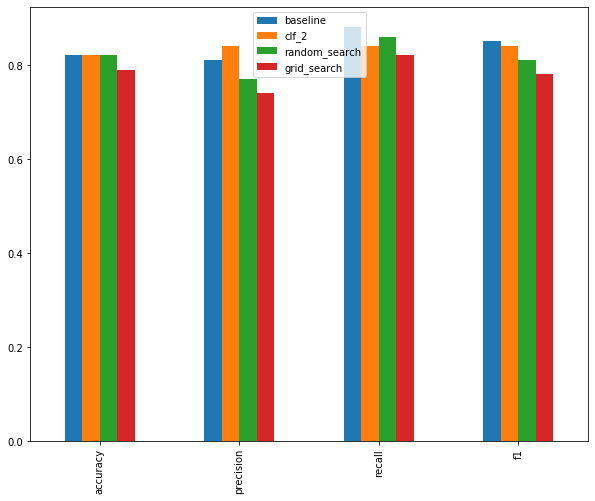

In [26]:
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                            "clf_2":clf_2_metrics,
                            "random_search":rs_metrics,
                              "grid_search":gs_metrics}
                            )
compare_metrics.plot.bar(figsize=(10,8))

## 6.Saving and loading trained machine models


In [27]:
import pickle

pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl","wb"))

In [28]:
# Load a saved model
loaded_pickle_model=pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [29]:
pickle_y_preds=loaded_pickle_model.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

Acc:78.69%
Precision:0.74
Recall:0.82
F1_score:0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [32]:
from joblib import dump,load
dump(gs_clf,filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [37]:
# import a saved joblib model

loaded_joblib_model=load(filename="gs_random_forest_model_1.joblib")

In [38]:
joblib_y_preds=loaded_joblib_model.predict(x_test)
evaluate_preds(y_test,joblib_y_preds)

Acc:78.69%
Precision:0.74
Recall:0.82
F1_score:0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7.Putting it all together!

In [41]:
data=pd.read_csv("car-sales-extended-missing-data.csv")

In [42]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [43]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [44]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [51]:
#Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
# set up random seed
import numpy as np
np.random.seed(42)
#import data and drop rows with missing data
data=pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

#Dedine different features and transformer pipeline
categorical_features=["Make","Colour"]
categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
])
door_feature=["Doors"]
door_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
])
numeric_features=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])
#setup the preprocessing steps(fill missing values and convert to number)
preprocessor=ColumnTransformer(
transformers=[
    ("cat",categorical_transformer,categorical_features),
    ("door",door_transformer,door_feature),
    ("num",numeric_transformer,numeric_features)
])
#creating a preprocessing and modelling pipeline
model=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",RandomForestRegressor())
])
x=data.drop("Price",axis=1)
y=data["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.22188417408787875

In [53]:
from sklearn.model_selection import GridSearchCV
pipe_grid={
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4]
}
gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.6s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   3.6s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   3.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   3.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [54]:
gs_model.score(x_test,y_test)

0.3339554263158365